In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np


In [3]:
df=yf.download('BTC-USD', start = '2010-1-1', end = '2018-12-31')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2018-12-26,3819.666748,3893.359619,3769.863770,3857.297607,3857.297607,5326547918
2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496,3654.833496,5130222366
2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701,3923.918701,5631554348


In [4]:
df=df.drop(['Volume'],axis=1)
df


,Open,High,Low,Close,Adj Close
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014
...,...,...,...,...,...
2018-12-26,3819.666748,3893.359619,3769.863770,3857.297607,3857.297607
2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496,3654.833496
2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701,3923.918701


In [5]:
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

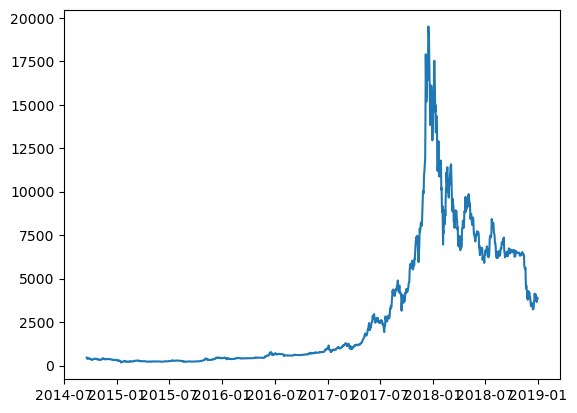

In [6]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [7]:
# train nd test split
#int(len(df)*0.9) training data used
train_end=int(len(df)*0.9)
train=list(df[0:train_end]['Adj Close'])
test=list(df[train_end:]['Adj Close'])
len(test)



157

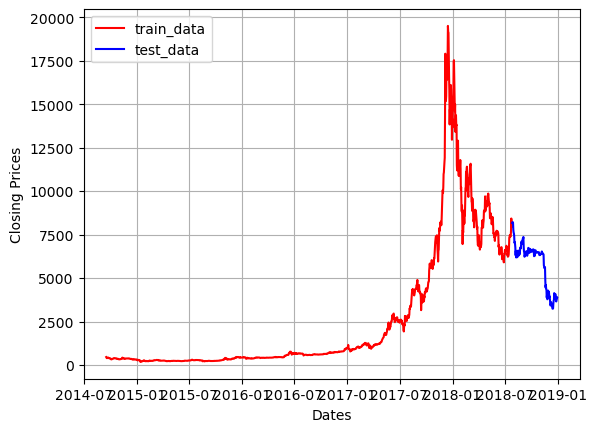

In [8]:
plt.plot(df[0:train_end]['Adj Close'],'red',label='train_data')
plt.plot(df[train_end:]['Adj Close'],'blue',label='test_data')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.legend()
plt.grid(True)

In [9]:
len(test),len(train)

(157, 1409)

In [10]:
Predictions=[]
length=len(test)


In [11]:
# To calculate the d value of arima(p,d,q)
from statsmodels.tsa.stattools import adfuller


In [12]:
result=adfuller(df['Adj Close'])
result[1]

0.2983631517477381

In [13]:
df['1st diff']=df['Adj Close']-df['Adj Close'].shift(1)
df.dropna(inplace=True)



In [14]:
result=adfuller(df['1st diff'])
result[1]

1.7573627609957562e-09

In [15]:
# d is 1

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [17]:
#pacf to find p value for ar
#acf to find q value for ma

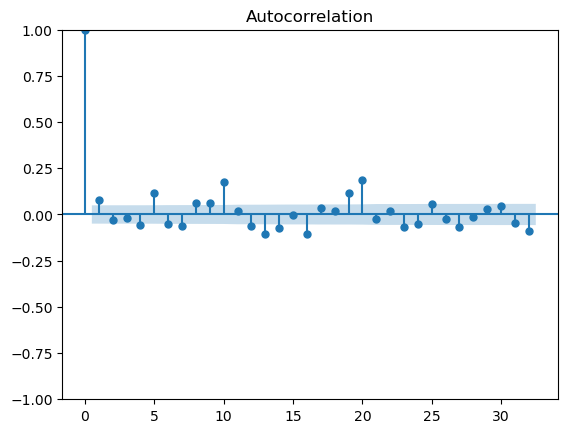

In [18]:
acf=plot_acf(df['1st diff'])

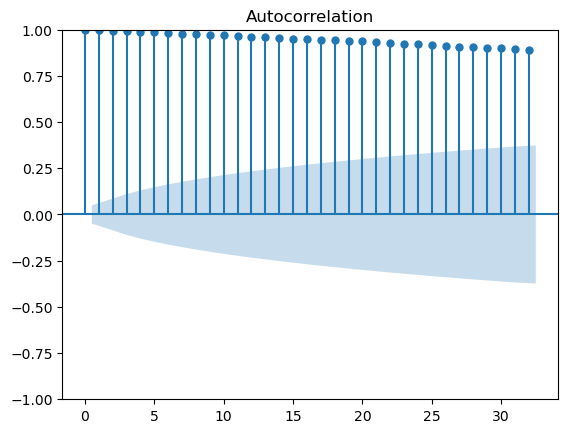

In [19]:
acf=plot_acf(df['Adj Close'])

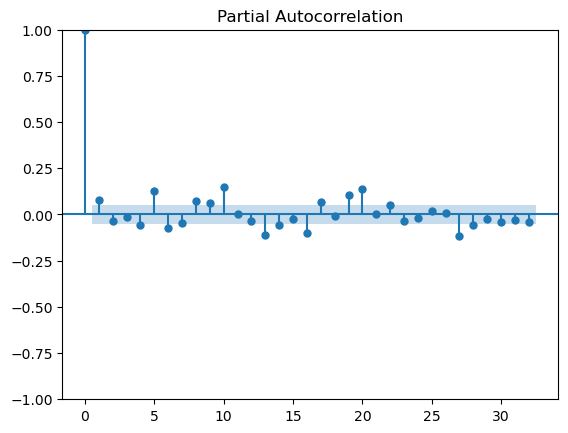

In [20]:
pacf=plot_pacf(df['1st diff'])

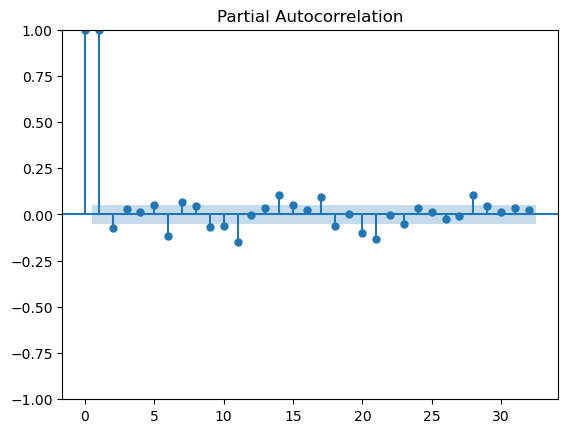

In [21]:
pacf=plot_pacf(df['Adj Close'])

In [22]:
otpt=list()
otpt

[]

In [23]:
for i in range(len(test)):
    model=ARIMA(train,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    otpt.append(output[0])
    y_predicted=output[0]
    #y_predicted=otpt
    Predictions.append(y_predicted)
    train.append(test[i])
    #print(output)
    #print(output[0])
    #list(output[0])
    #break    

In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1565
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -10963.803
Date:                Thu, 21 Mar 2024   AIC                          21937.607
Time:                        20:46:49   BIC                          21964.382
Sample:                             0   HQIC                         21947.561
                               - 1565                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0786      0.007     11.031      0.000       0.065       0.093
ar.L2         -0.0365      0.008     -4.306      0.000      -0.053      -0.020
ar.L3         -0.0075      0.009     -0.842      0.400      -0.025       0.010
ar.L4         -0.0586      0.007     -7.994      0.000      -0.073      -0.044
sigma2      7.203e+04    658.038    109.464      0.000    7.07e+04    7.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             90778.54
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):            1706.11   Skew:                             1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
len(Predictions),len(test)

(157, 157)

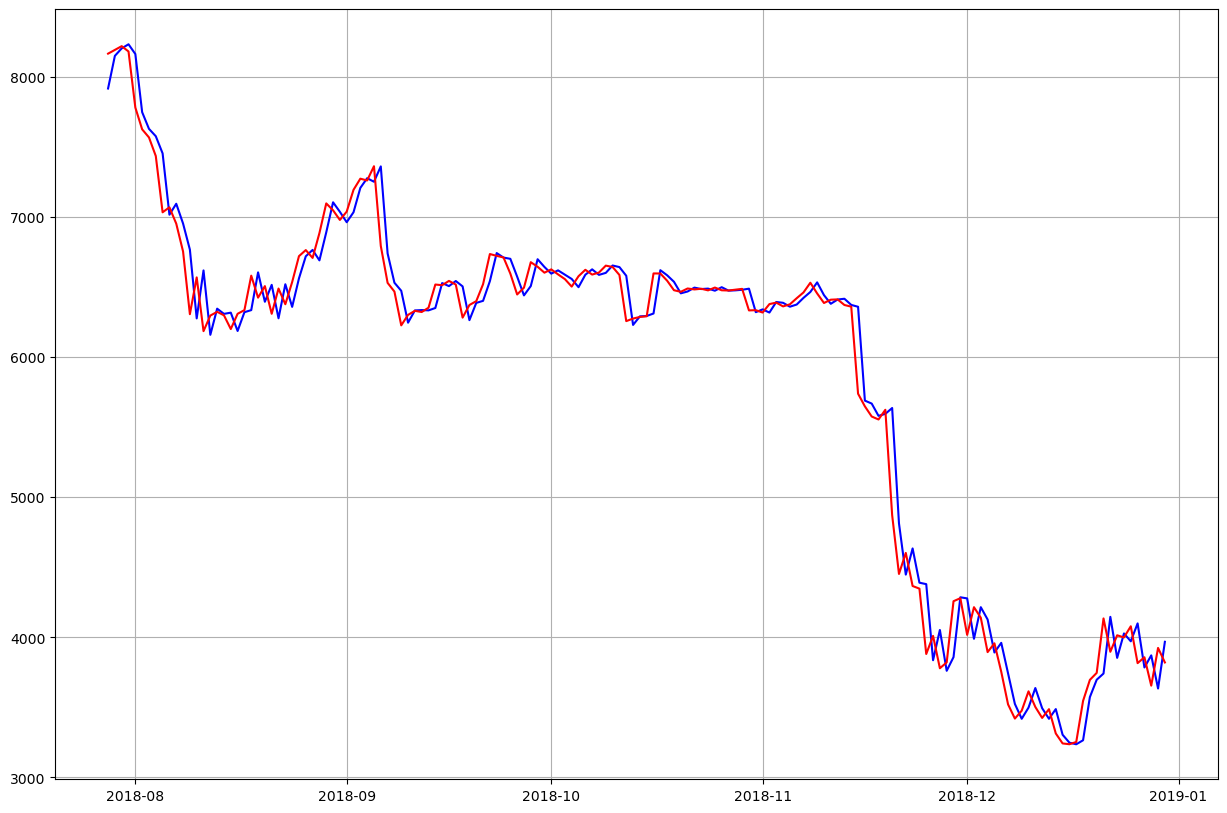

In [43]:
plt.figure(figsize=(15,10))
plt.grid(True)
rnge=df[train_end:].index
prpr=Predictions[:-1]
#plt.plot(rnge,Predictions,color='blue')
plt.plot(rnge,prpr,color='blue')
plt.plot(rnge,test[:-1],color='red')
#plt.figure(figsize=(15,100))
#len(rnge)

In [44]:
len(Predictions),len(test)

(157, 157)

In [42]:
# Mean absolute percentage error
mape=np.mean(np.abs(np.array(Predictions)-np.array(test))/np.abs(test))
Accuracy=100-(100*mape)
Accuracy

97.68061639808424